In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

In [80]:
store_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/raw/store.csv')
train_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/raw/train.csv') 
test_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/raw/test.csv') 

C:\Users\rodri\AppData\Local\Temp\ipykernel_23836\4222408318.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/raw/train.csv')


In [81]:
# CARACTERISTICAS GENERALES DE CADA UNO DE LOS TIPOS DE TIENDAS 

In [82]:
agg_funcs = {
    'CompetitionDistance': ['mean', 'min', 'max'],  
    'CompetitionOpenSinceYear': 'min',  
    'Promo2': 'mean'  
}

store_data_summary_improved = store_data.groupby('StoreType').agg(agg_funcs).reset_index()

store_data_summary_improved.columns = ['_'.join(col).strip('_') for col in store_data_summary_improved.columns]

surtido_mode = store_data.groupby('StoreType')['Assortment'].agg(lambda x: x.mode()[0]).reset_index()
surtido_mode.columns = ['StoreType', 'Surtido']

store_data_summary_improved = pd.merge(store_data_summary_improved, surtido_mode, on='StoreType')

store_data_summary_improved.columns = [
    'Tipo de Tienda', 'Distancia Promedio a Competencia (m)',
    'Distancia Mínima a Competencia (m)', 'Distancia Máxima a Competencia (m)',
    'Año Más Antiguo de Competencia', 'Porcentaje de Participación en Promo2 (%)', 'Surtido'
]

store_data_summary_improved['Porcentaje de Participación en Promo2 (%)'] = (
    store_data_summary_improved['Porcentaje de Participación en Promo2 (%)'] * 100
).round(2)

store_data_summary_improved['Distancia Promedio a Competencia (m)'] = store_data_summary_improved['Distancia Promedio a Competencia (m)'].round(2)
store_data_summary_improved['Distancia Mínima a Competencia (m)'] = store_data_summary_improved['Distancia Mínima a Competencia (m)'].astype(int)
store_data_summary_improved['Distancia Máxima a Competencia (m)'] = store_data_summary_improved['Distancia Máxima a Competencia (m)'].astype(int)

print(store_data_summary_improved) 


  Tipo de Tienda  Distancia Promedio a Competencia (m)  \
0              a                               5123.06   
1              b                               1060.59   
2              c                               3522.57   
3              d                               6913.06   

   Distancia Mínima a Competencia (m)  Distancia Máxima a Competencia (m)  \
0                                  20                               75860   
1                                  90                                3640   
2                                  40                               45740   
3                                  50                               48330   

   Año Más Antiguo de Competencia  Porcentaje de Participación en Promo2 (%)  \
0                          1900.0                                      48.01   
1                          1999.0                                      29.41   
2                          1994.0                                      50.68   
3  

In [29]:
# store.csv 

In [83]:
store_data.fillna(method='ffill', inplace=True) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_23836\831556641.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  store_data.fillna(method='ffill', inplace=True)


In [31]:
# test.csv

In [84]:
test_data['Date'] = pd.to_datetime(test_data['Date']) 

In [32]:
# train.csv

In [85]:
train_data['Date'] = pd.to_datetime(train_data['Date']) 

In [86]:
describe_train = train_data.describe() 
describe_train 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


In [87]:
train_data['Open'].fillna(1, inplace=True) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_23836\1179608501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Open'].fillna(1, inplace=True)


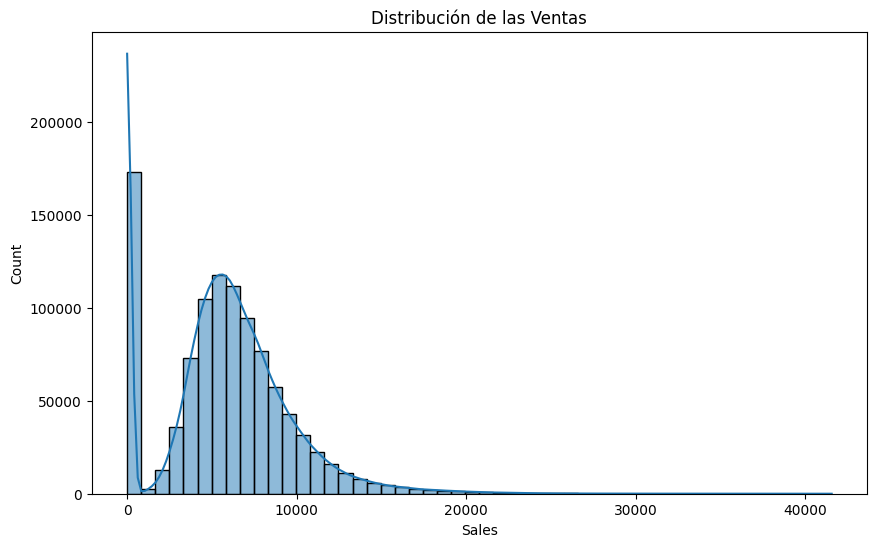

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['Sales'], bins=50, kde=True)
plt.title('Distribución de las Ventas')
plt.show() 

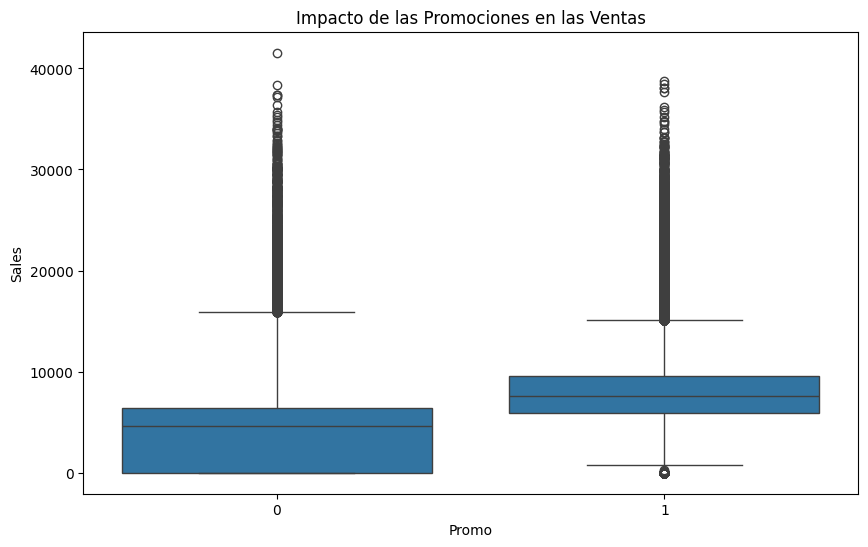

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Impacto de las Promociones en las Ventas') 
plt.show() 

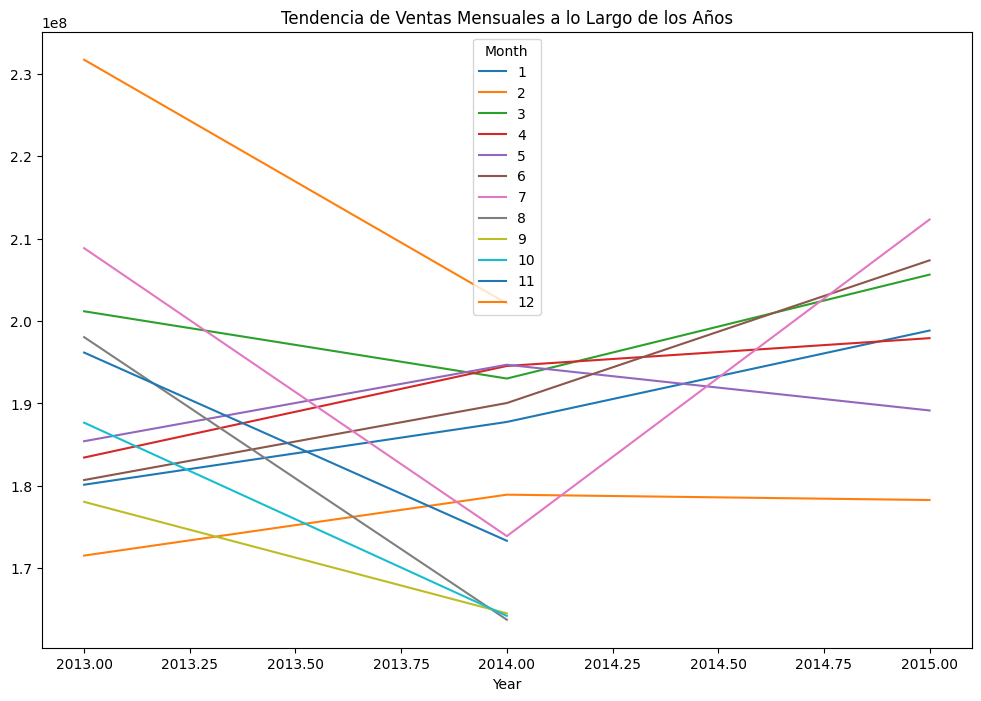

In [90]:
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
sales_trend = train_data.groupby(['Year', 'Month'])['Sales'].sum().unstack()
sales_trend.plot(kind='line', figsize=(12,8))
plt.title('Tendencia de Ventas Mensuales a lo Largo de los Años')
plt.show() 

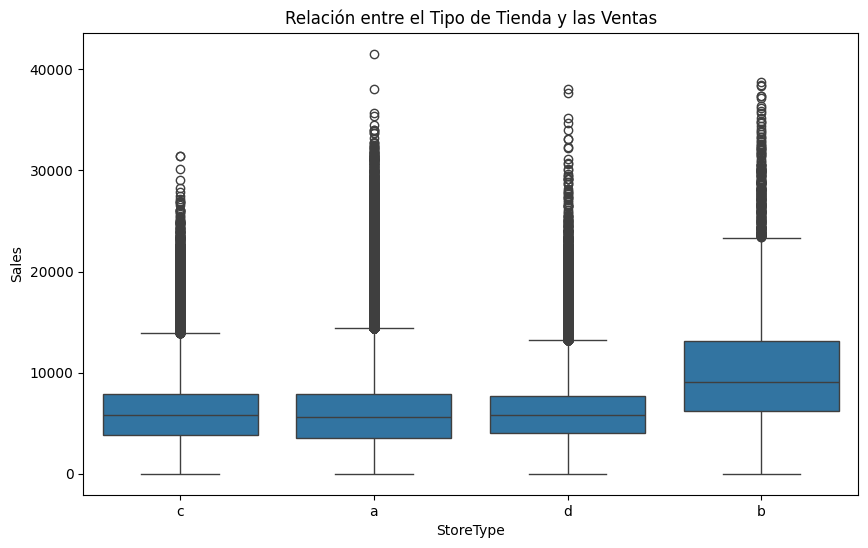

In [91]:
store_sales = pd.merge(train_data, store_data, on='Store')
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales', data=store_sales)
plt.title('Relación entre el Tipo de Tienda y las Ventas')
plt.show() 

In [92]:
train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek 
train_data['WeekOfYear'] = train_data['Date'].dt.isocalendar().week 
train_data['IsHoliday'] = np.where((train_data['StateHoliday'] != '0') | (train_data['SchoolHoliday'] == 1), 1, 0) 

In [93]:
train_data = train_data.sort_values(by=['Store', 'Date'])
train_data['Sales_Lag1'] = train_data.groupby('Store')['Sales'].shift(1)
train_data['Sales_Lag1'].fillna(0, inplace=True) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_23836\3061318374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Sales_Lag1'].fillna(0, inplace=True)


In [94]:
print(train_data[['Date', 'Store', 'Sales', 'Sales_Lag1']].head(15)) 

              Date  Store  Sales  Sales_Lag1
1016095 2013-01-01      1      0         0.0
1014980 2013-01-02      1   5530         0.0
1013865 2013-01-03      1   4327      5530.0
1012750 2013-01-04      1   4486      4327.0
1011635 2013-01-05      1   4997      4486.0
1010520 2013-01-06      1      0      4997.0
1009405 2013-01-07      1   7176         0.0
1008290 2013-01-08      1   5580      7176.0
1007175 2013-01-09      1   5471      5580.0
1006060 2013-01-10      1   4892      5471.0
1004945 2013-01-11      1   4881      4892.0
1003830 2013-01-12      1   4952      4881.0
1002715 2013-01-13      1      0      4952.0
1001600 2013-01-14      1   4717         0.0
1000485 2013-01-15      1   3900      4717.0


In [95]:
train_data = train_data[train_data['Sales'] > 0] 

In [96]:
train_data.fillna(0, inplace=True) 

In [97]:
train_data = pd.get_dummies(train_data, columns=['StateHoliday'], drop_first=True) 

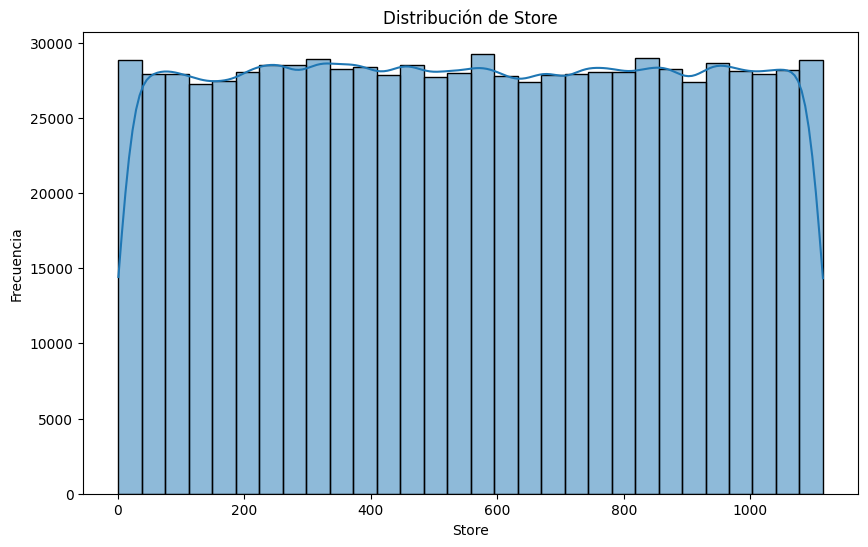

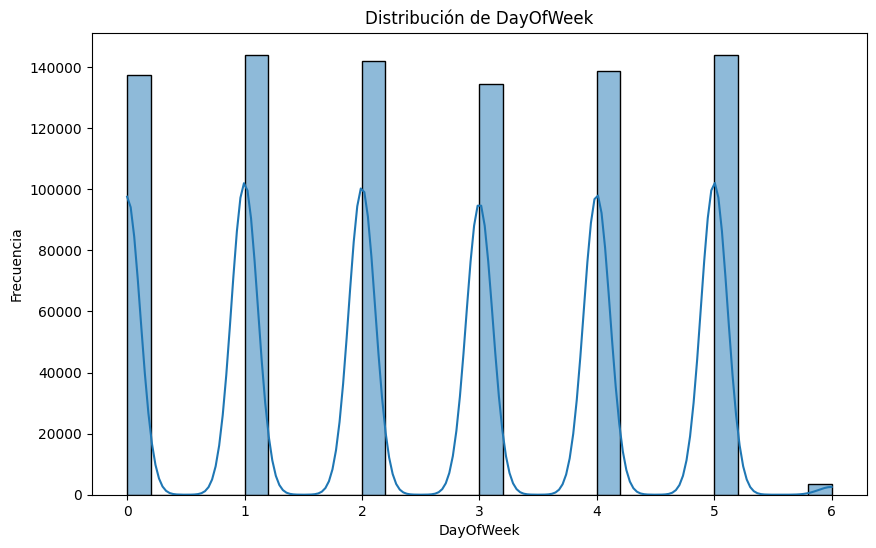

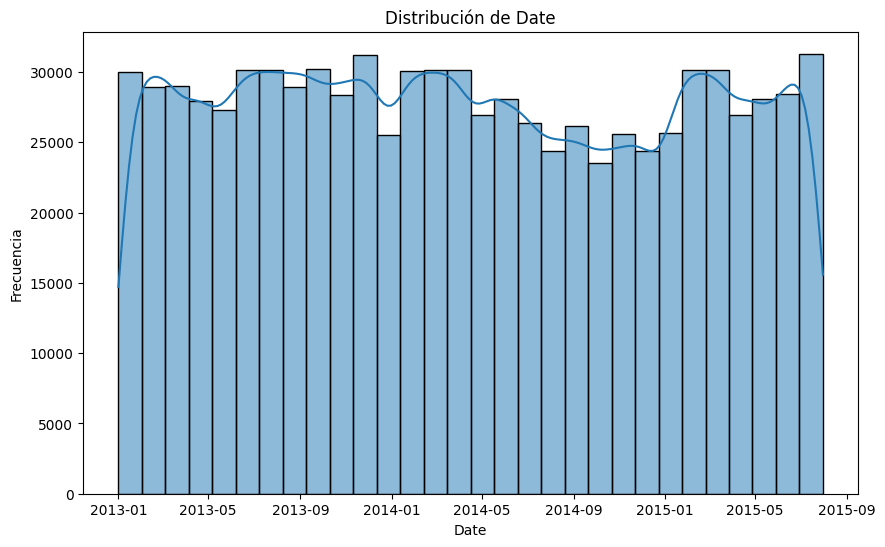

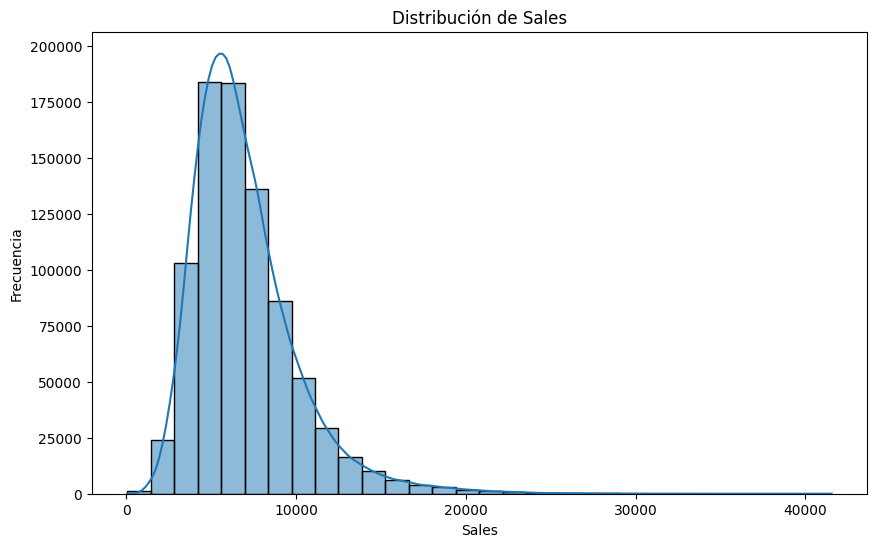

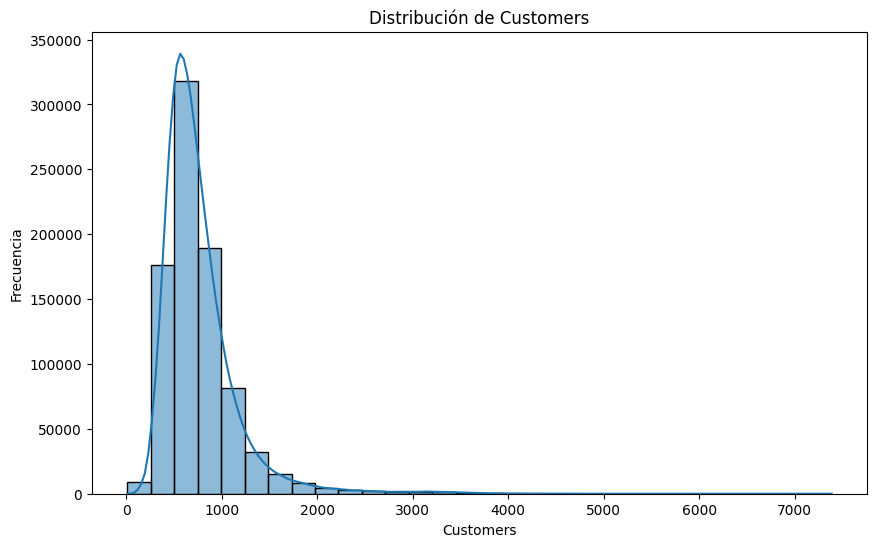

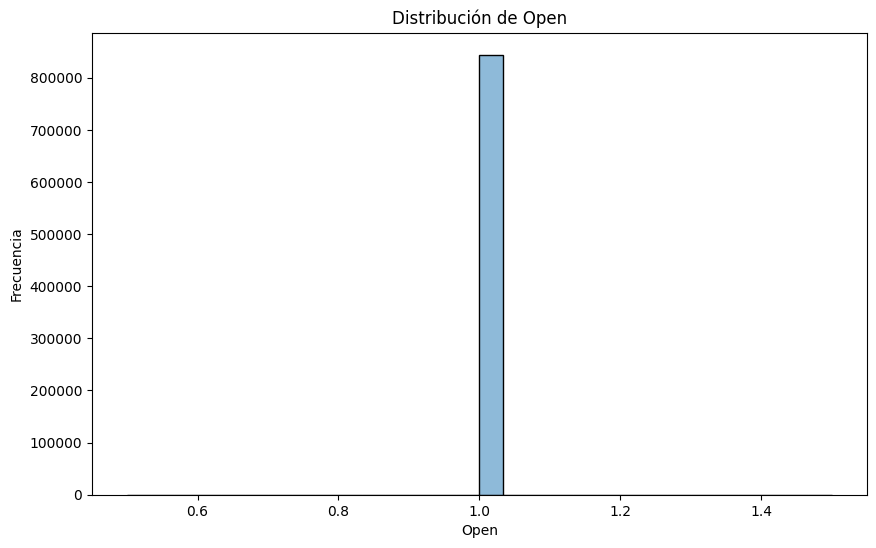

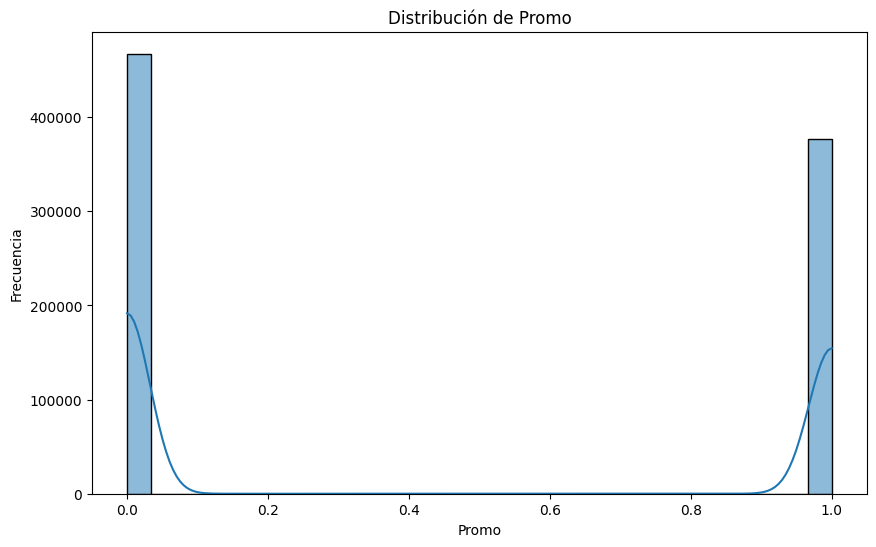

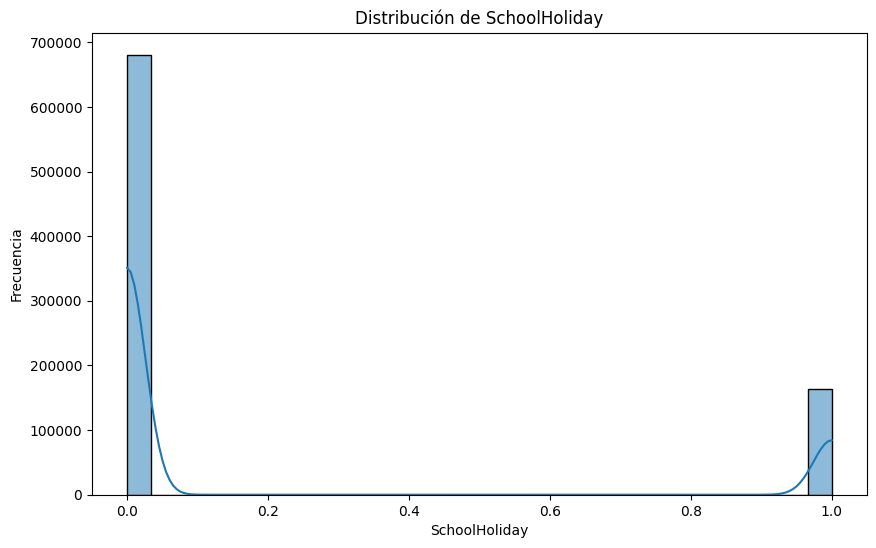

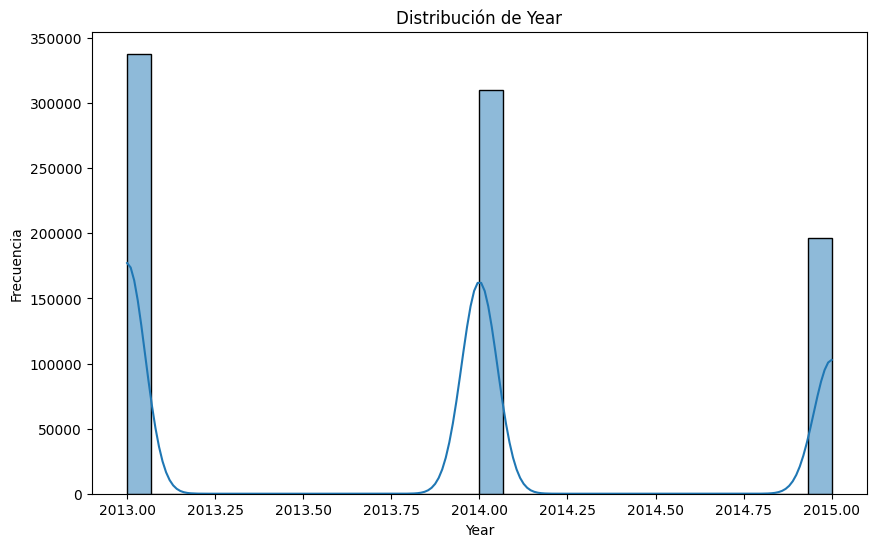

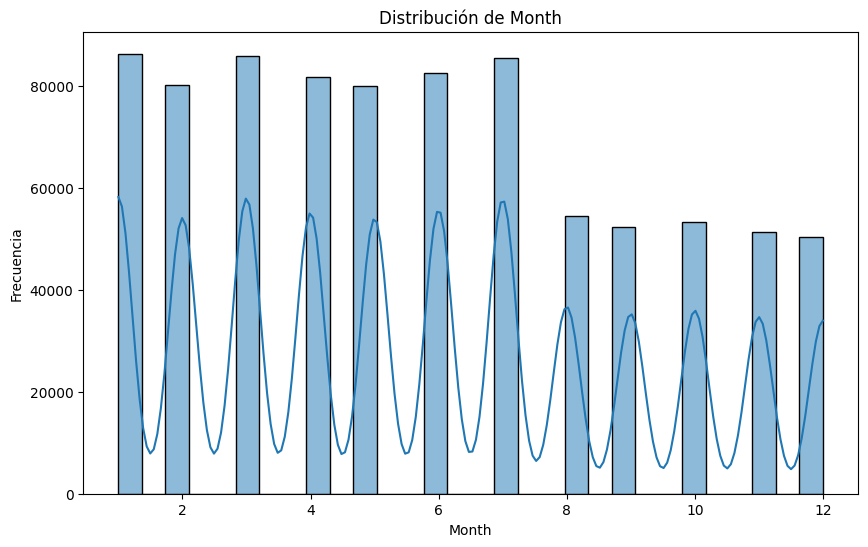

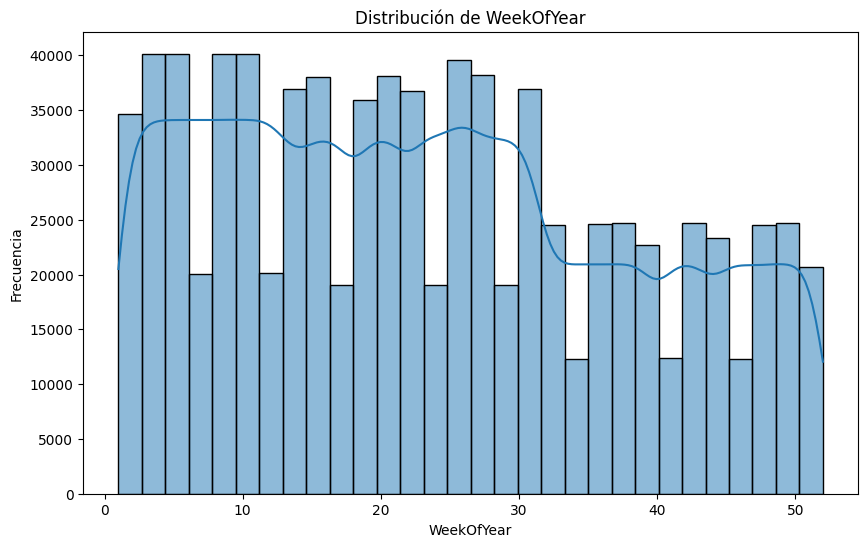

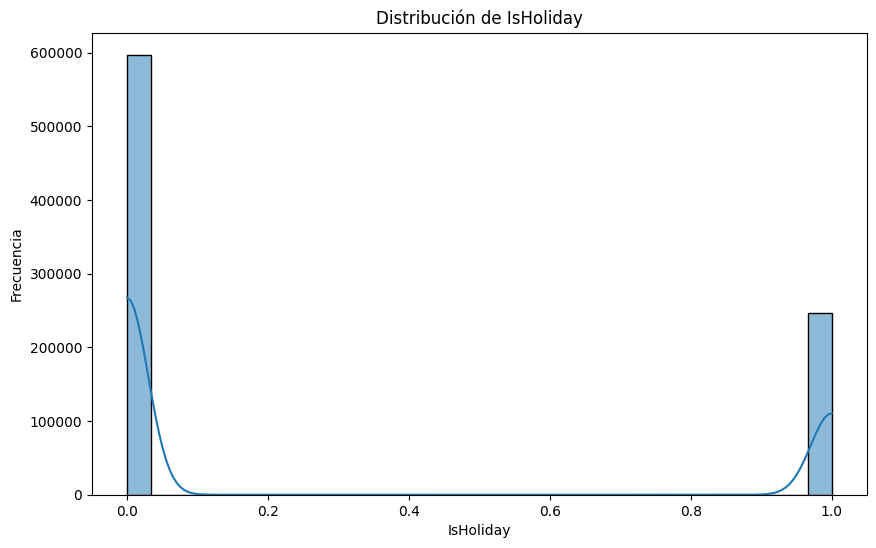

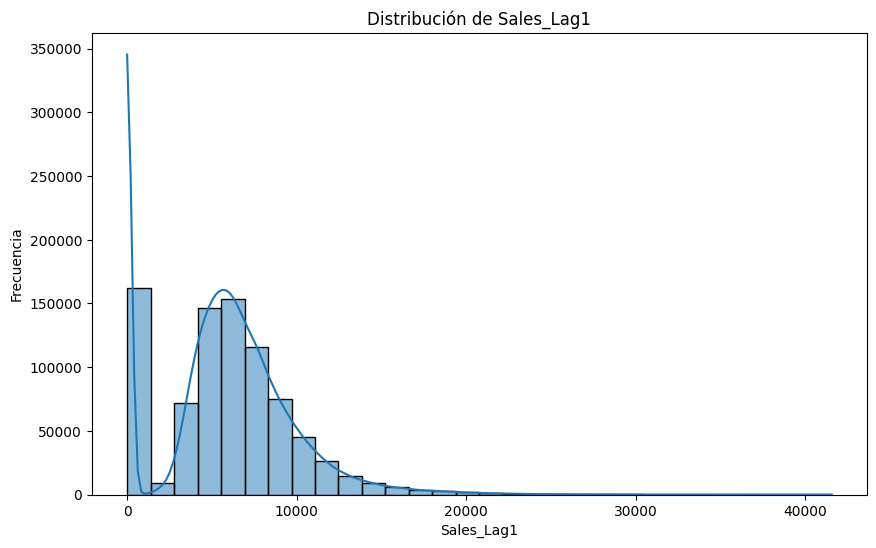

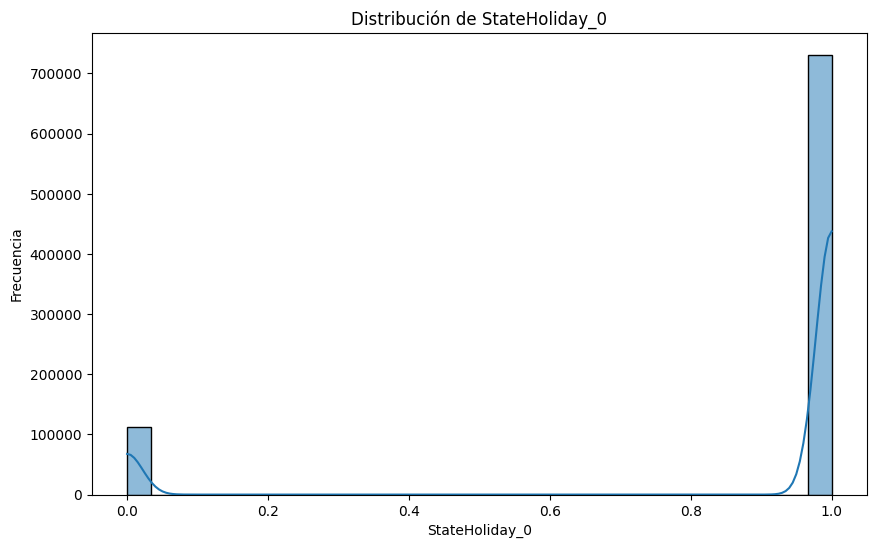

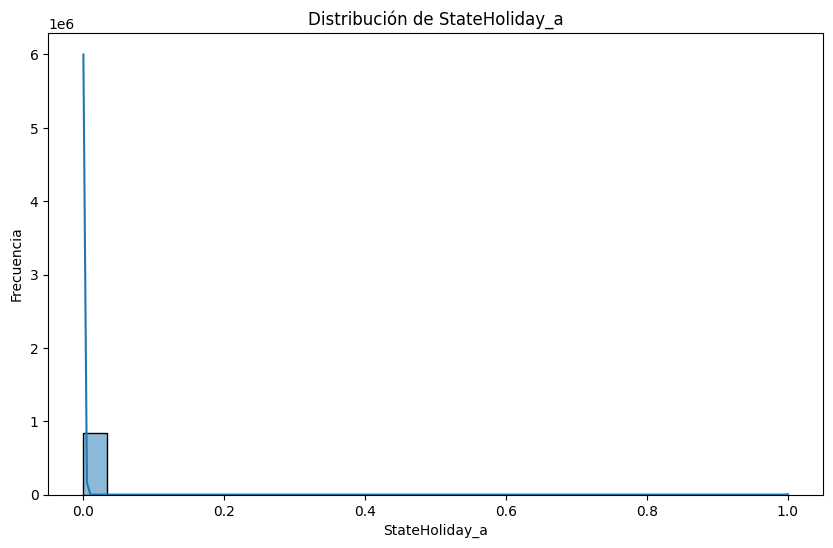

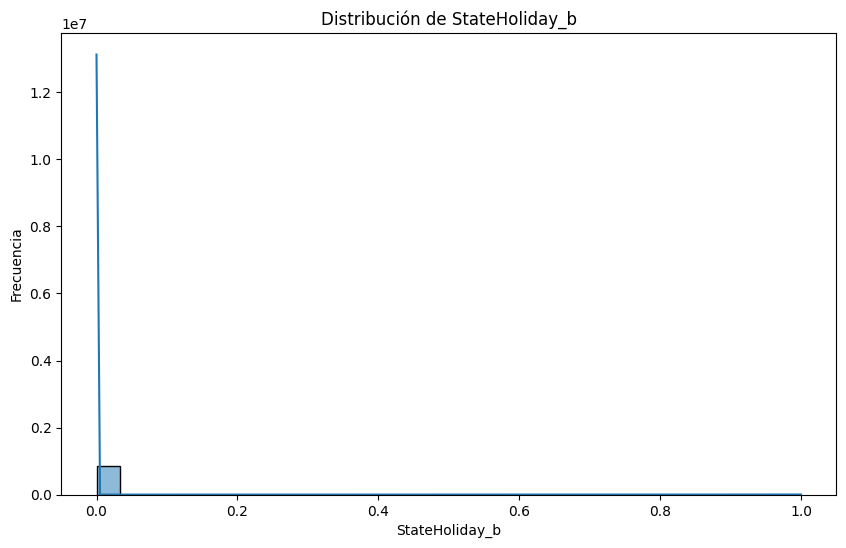

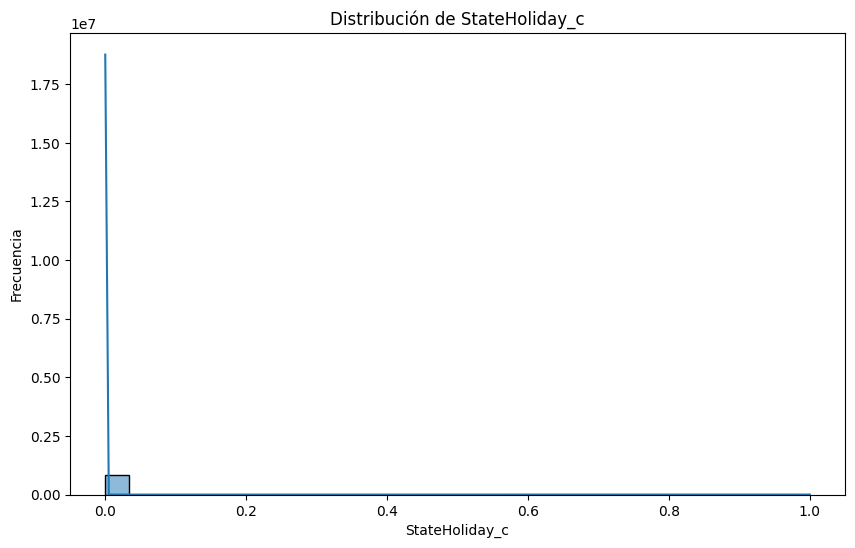

In [98]:
numerical_columns = train_data

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [99]:
predictors = train_data.drop(columns=['Open'])  
corr_matrix_predictors = predictors.corr() 

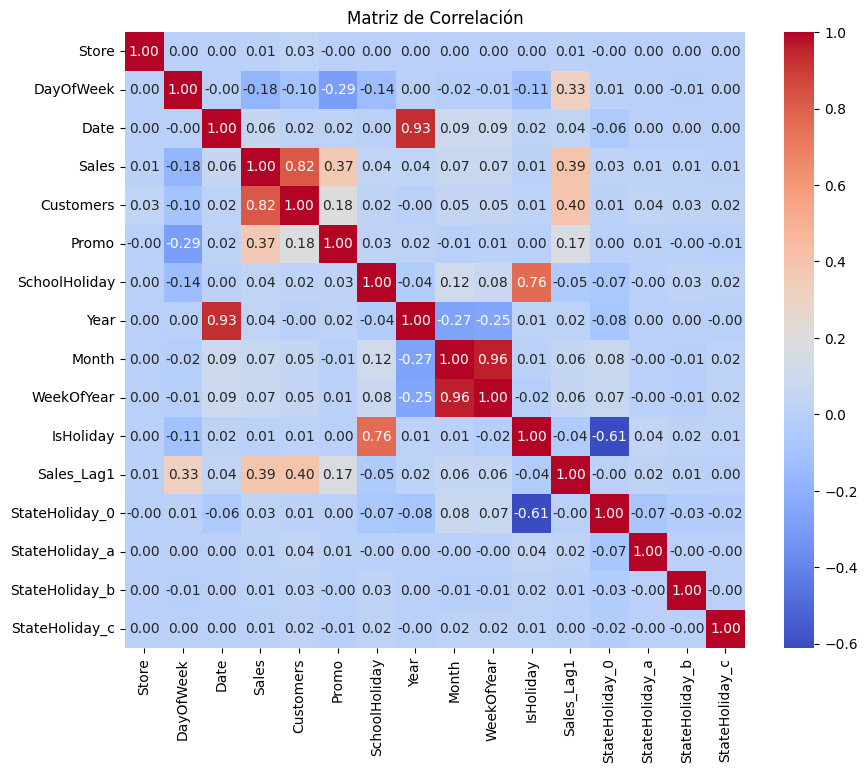

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_predictors, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show() 

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns 

predictors = train_data.drop(columns=['Open', 'Sales'])
corr_predictors = predictors.corr() 

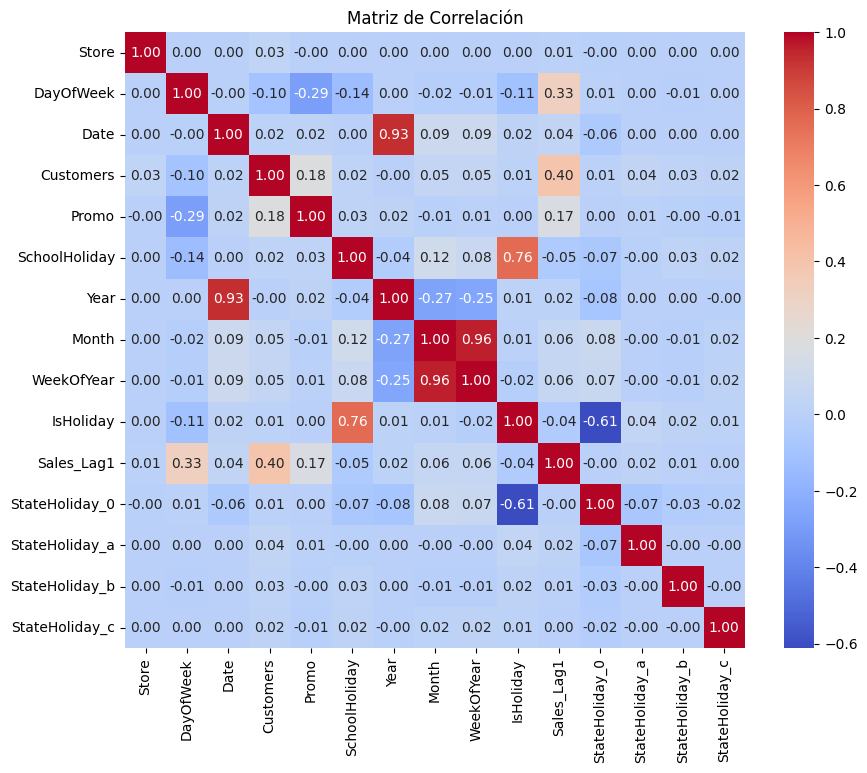

In [102]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_predictors, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show() 

In [103]:
predictors.columns 

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Promo', 'SchoolHoliday',
       'Year', 'Month', 'WeekOfYear', 'IsHoliday', 'Sales_Lag1',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

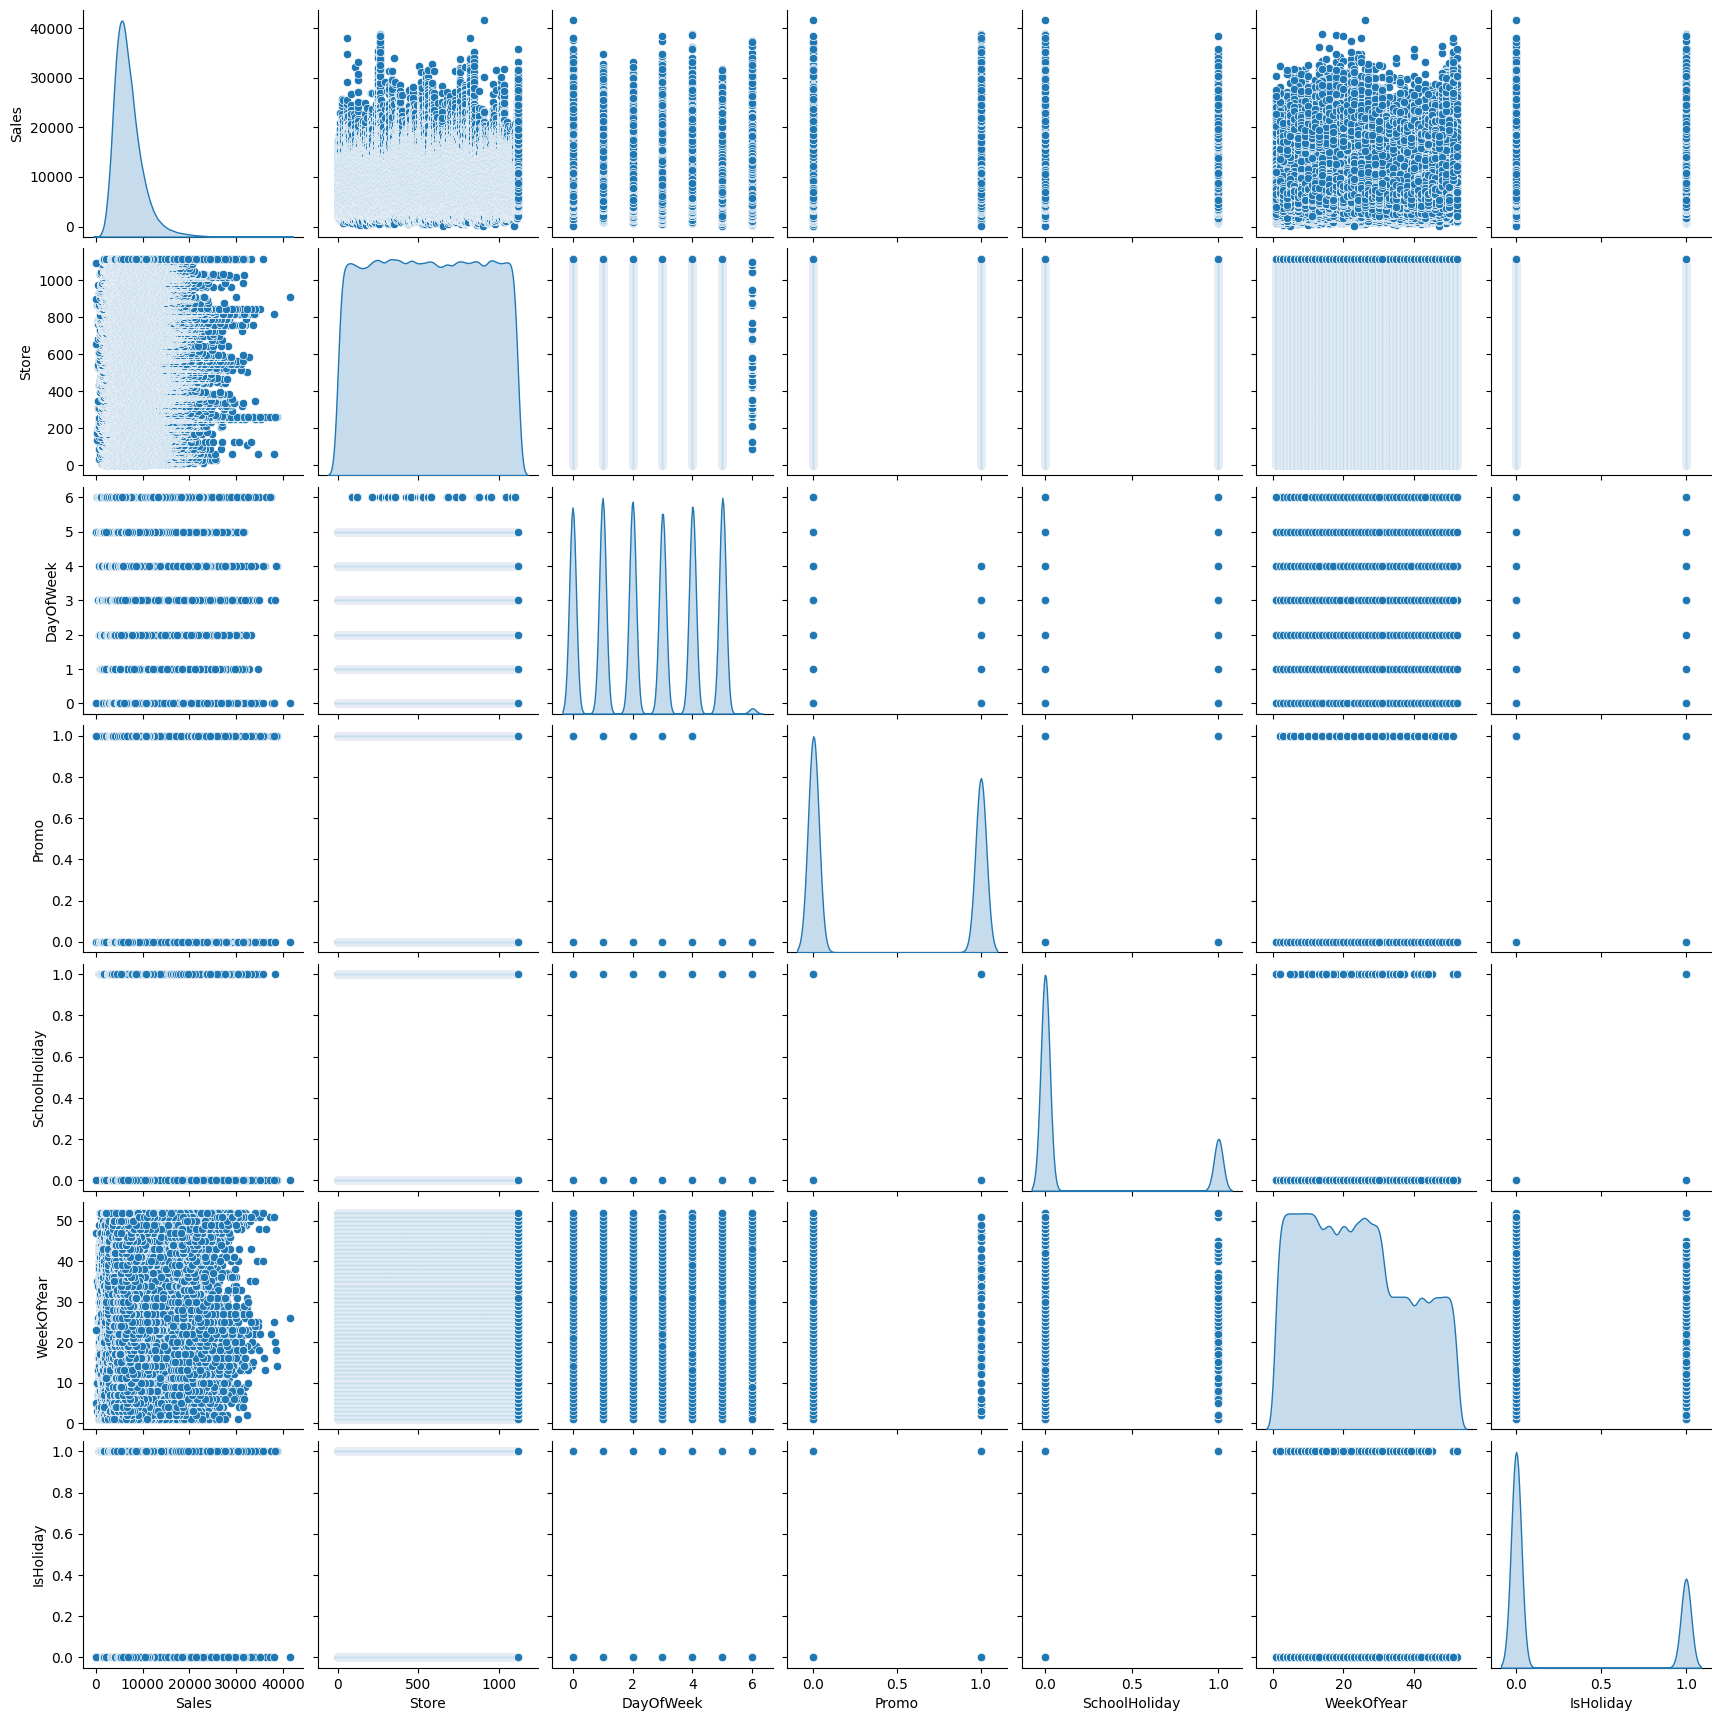

In [104]:
subset_columns = ['Sales', 'Store', 'DayOfWeek','Promo', 'SchoolHoliday', 'WeekOfYear', 'IsHoliday']  
sns.pairplot(train_data[subset_columns], diag_kind='kde') 
plt.show() 

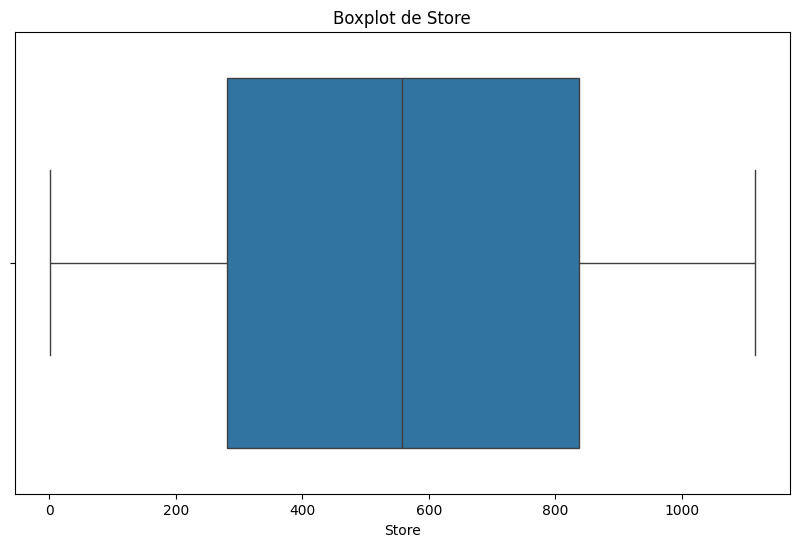

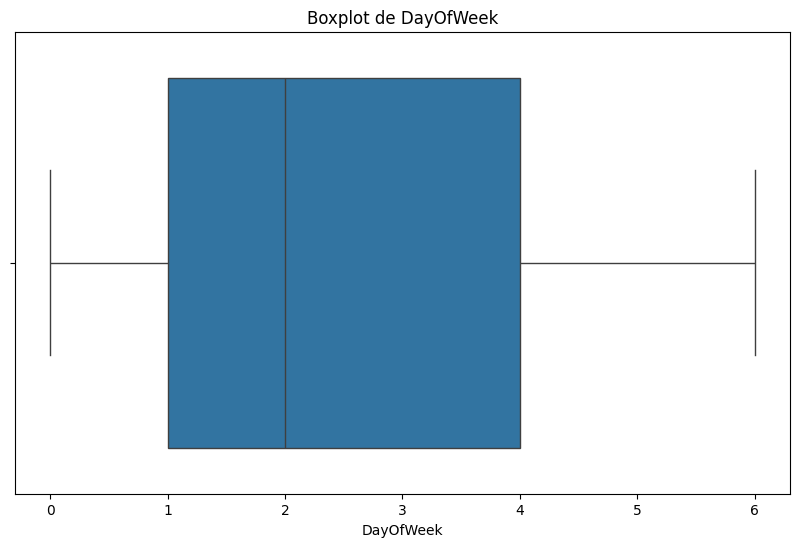

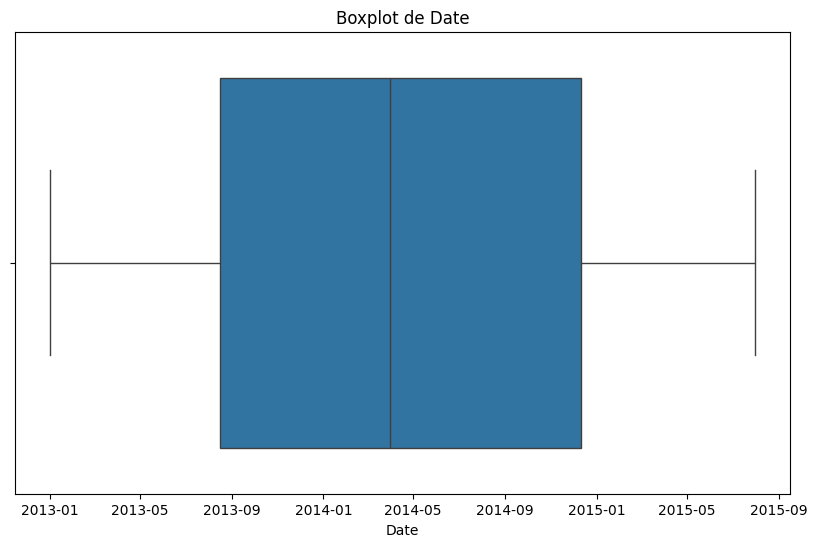

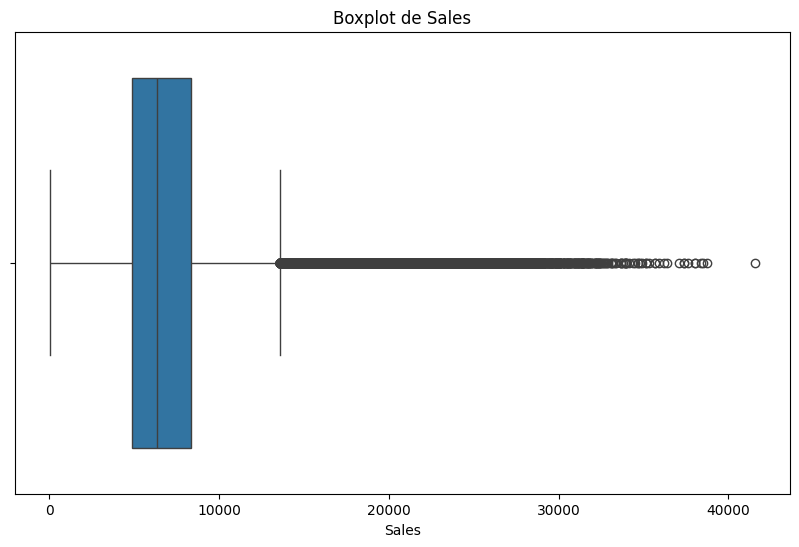

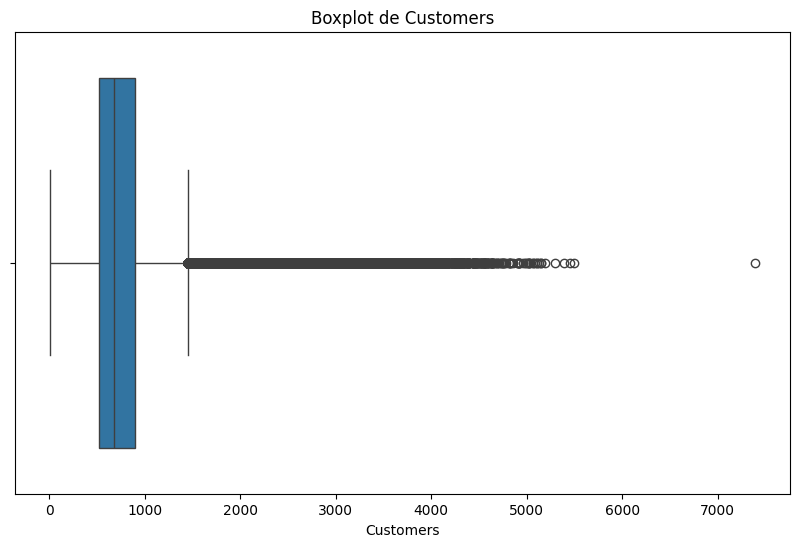

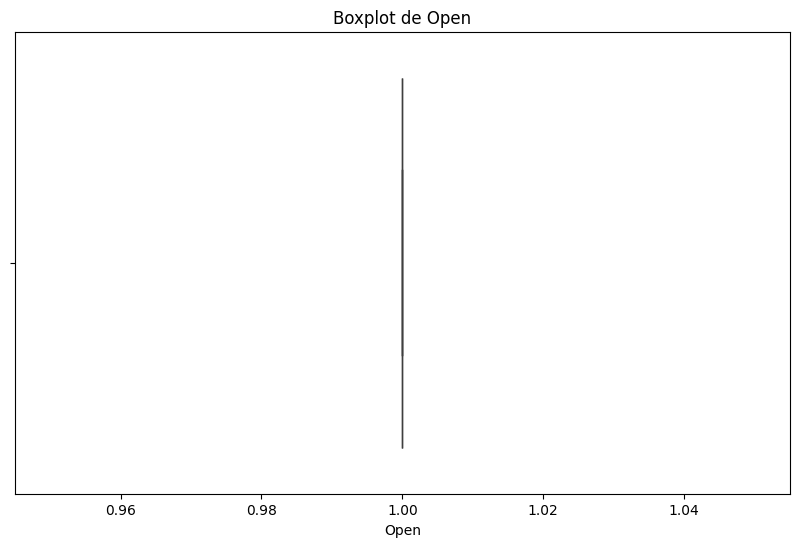

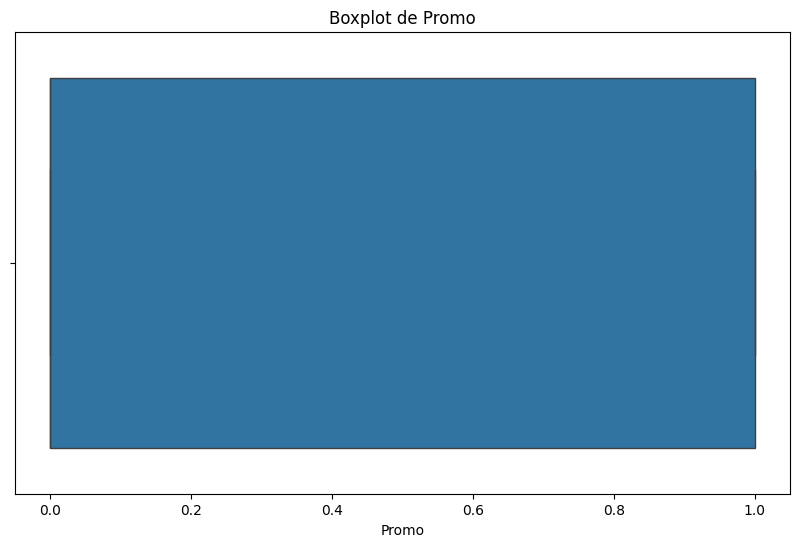

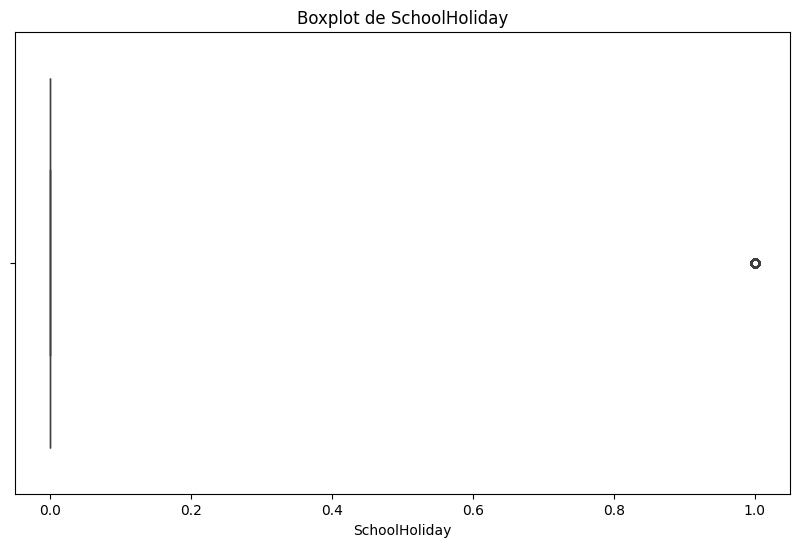

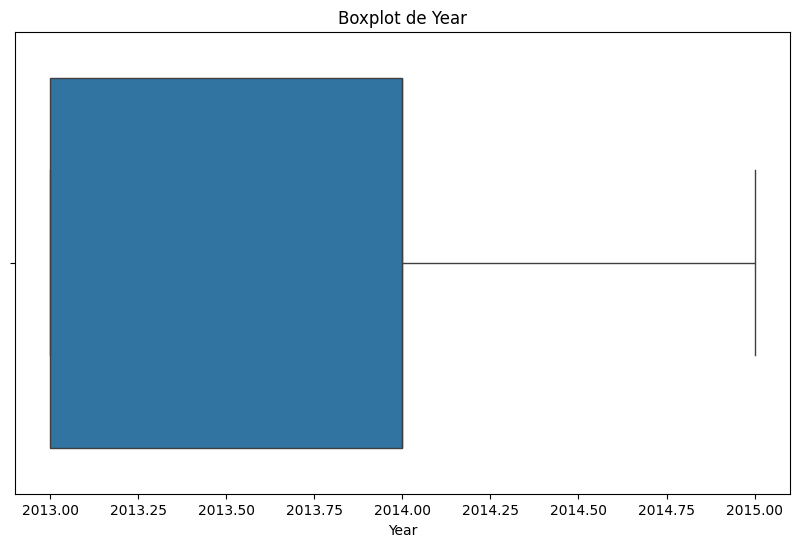

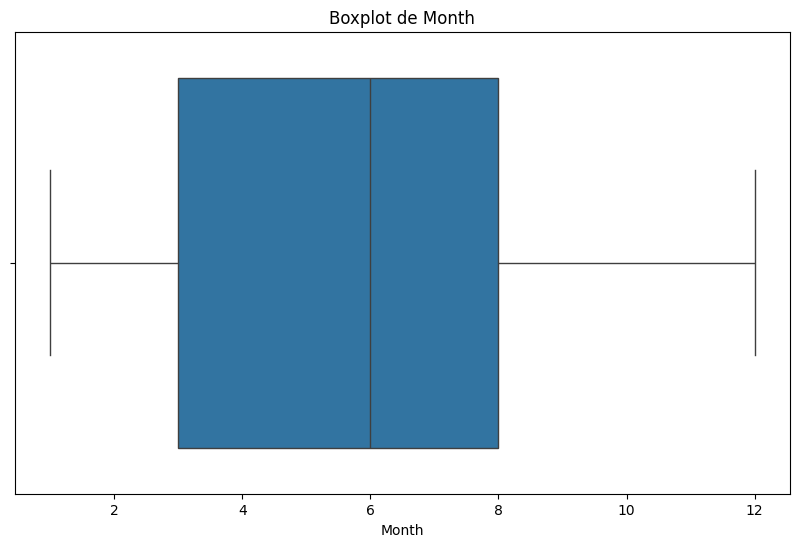

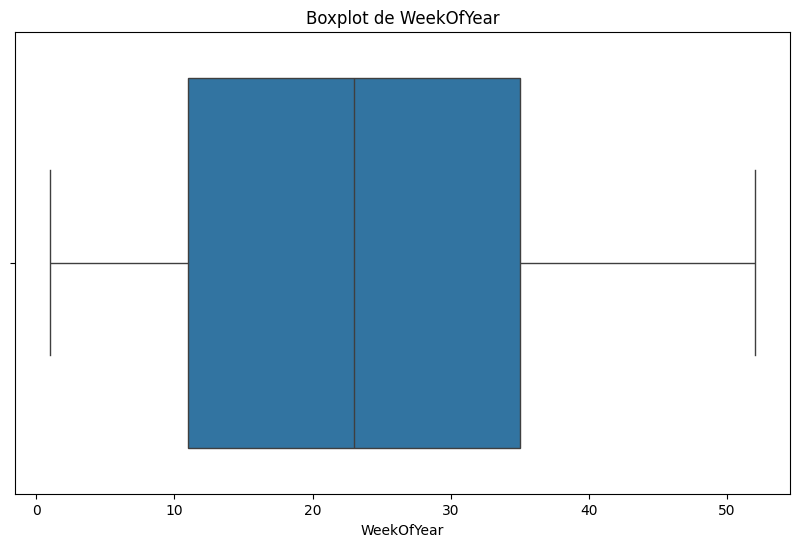

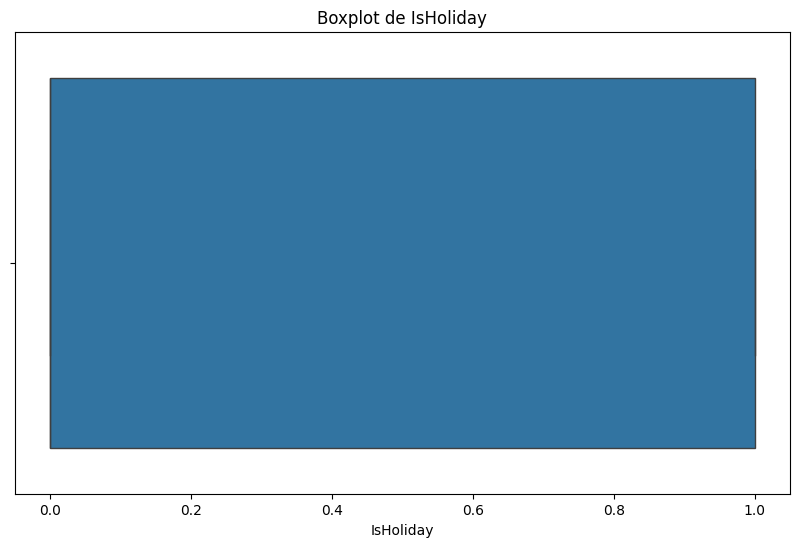

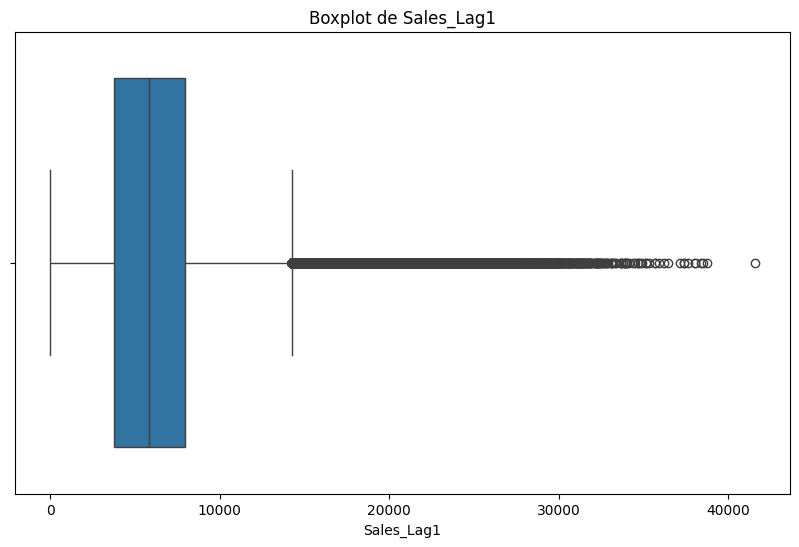

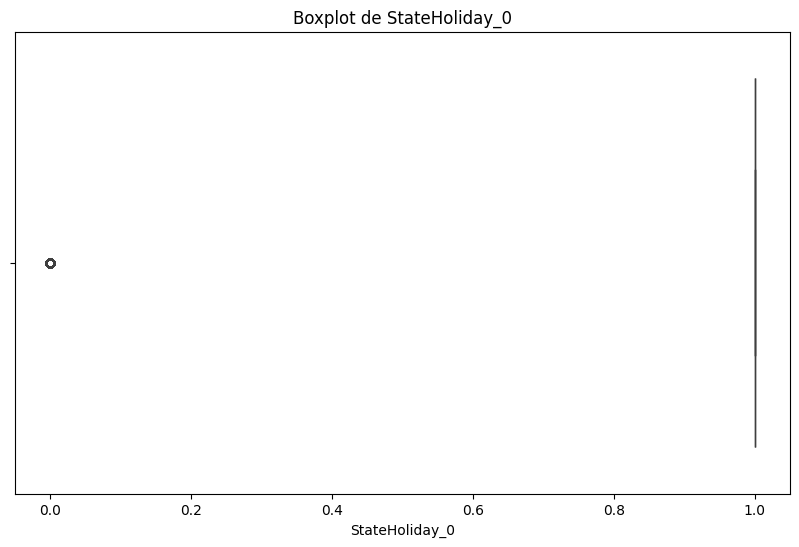

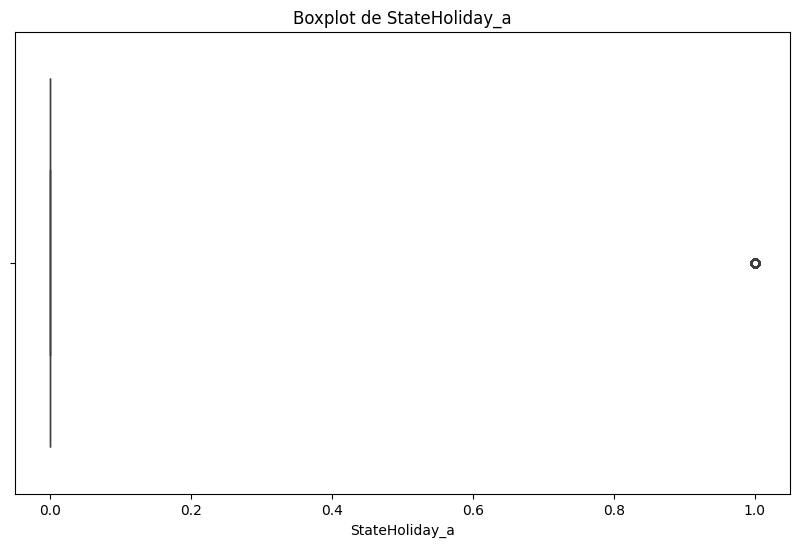

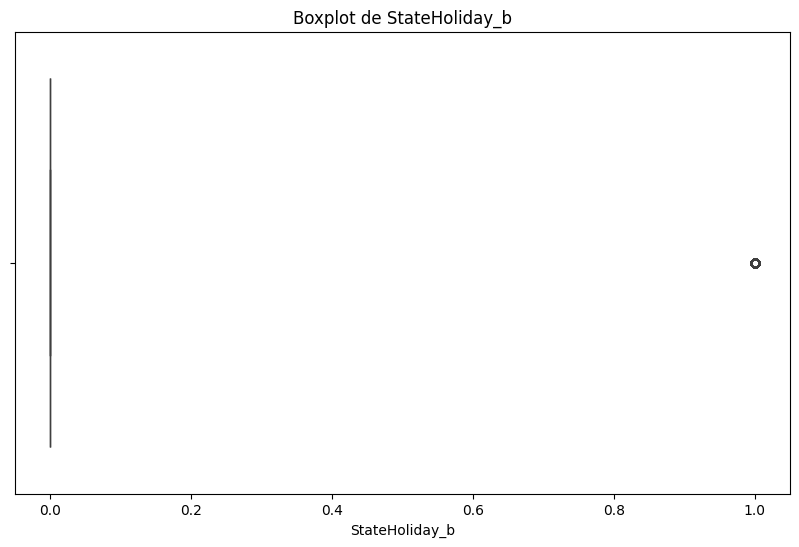

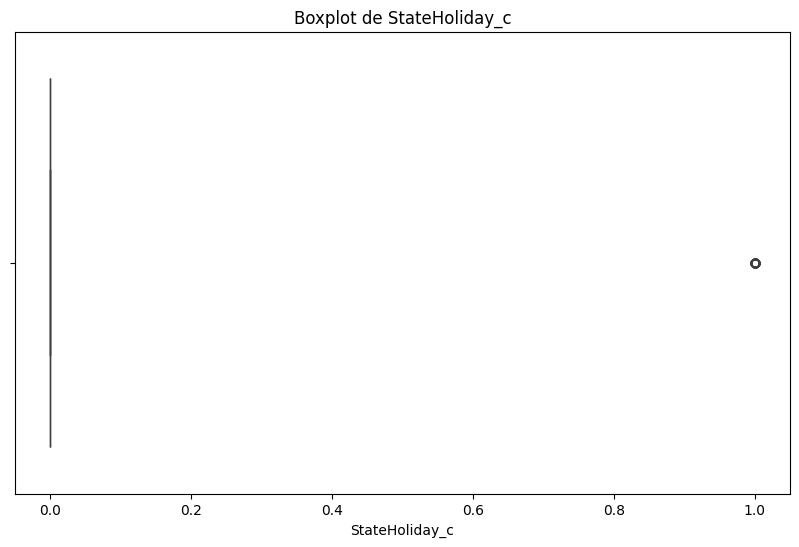

In [105]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[column])
    plt.title(f'Boxplot de {column}')
    plt.show() 

In [106]:
import pandas as pd

train_data['Date'] = pd.to_datetime(train_data['Date'])

train_data['Quarter'] = train_data['Date'].dt.to_period('Q')

total_sales_per_quarter = train_data.groupby('Quarter')['Sales'].sum()

total_sales_per_quarter = total_sales_per_quarter.reset_index()

print("Total de ventas de todas las tiendas por trimestre:")
print(total_sales_per_quarter) 

Total de ventas de todas las tiendas por trimestre:
   Quarter      Sales
0   2013Q1  552846851
1   2013Q2  549544846
2   2013Q3  584940572
3   2013Q4  615543815
4   2014Q1  559697318
5   2014Q2  579285285
6   2014Q3  502157350
7   2014Q4  539664943
8   2015Q1  582750871
9   2015Q2  594426156
10  2015Q3  212322616


In [107]:
print(total_sales_per_quarter.dtypes) 

Quarter    period[Q-DEC]
Sales              int64
dtype: object


In [108]:
total_sales_per_quarter['Quarter'] = total_sales_per_quarter['Quarter'].dt.to_timestamp()

print(total_sales_per_quarter.head()) 

     Quarter      Sales
0 2013-01-01  552846851
1 2013-04-01  549544846
2 2013-07-01  584940572
3 2013-10-01  615543815
4 2014-01-01  559697318


In [109]:
total_sales_per_quarter['Quarter'].dtype 

dtype('<M8[ns]')

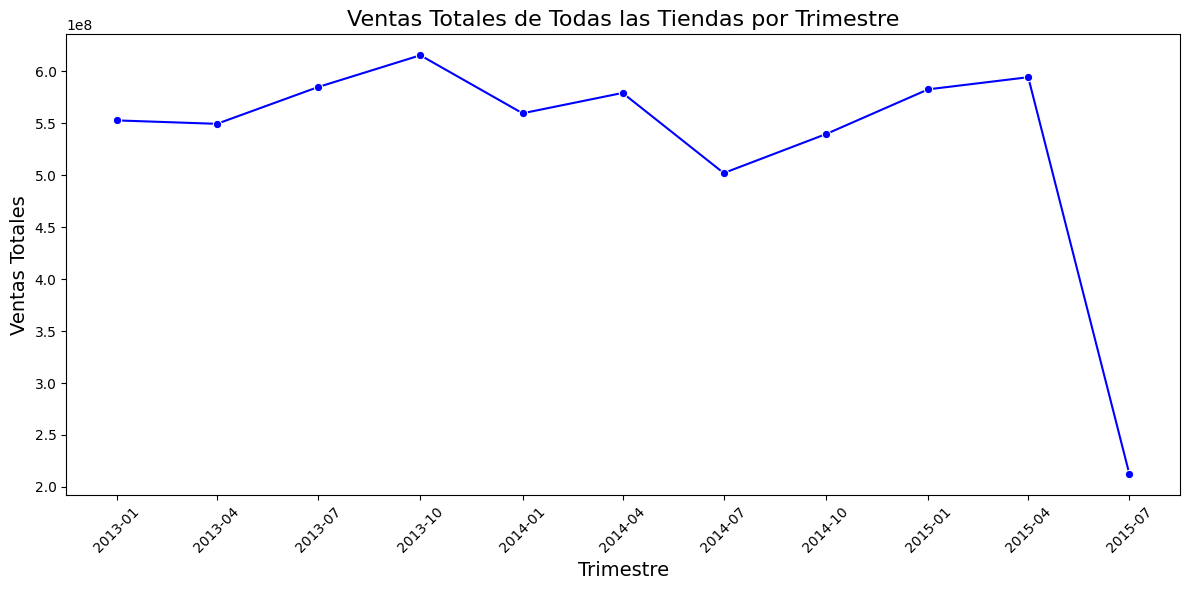

In [110]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=total_sales_per_quarter, x='Quarter', y='Sales', marker='o', color='b')

plt.title('Ventas Totales de Todas las Tiendas por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show() 

# Las cifras de las ventas totales el gráfico se debe multiplicar por 100 millones de Euros 

In [132]:
total_sales_per_quarter_per_store.head()

StoreType,Quarter,a,b,c,d
0,2013Q1,301326829,12969080,73482140,165068802
1,2013Q2,297852814,14395432,72566988,164729612
2,2013Q3,316359376,14445485,76311745,177823966
3,2013Q4,330524008,16156562,82394425,186468820
4,2014Q1,300477081,14879533,72826264,171514440


In [135]:
import pandas as pd

store_sales['Date'] = pd.to_datetime(store_sales['Date'])

store_sales['Quarter'] = store_sales['Date'].dt.to_period('Q')

total_sales_per_quarter_per_store = store_sales.groupby(['Quarter', 'StoreType'])['Sales'].sum().unstack()

total_sales_per_quarter_per_store = total_sales_per_quarter_per_store.reset_index() 

print("Total de ventas por tipo de tienda por trimestre:")
print(total_sales_per_quarter_per_store) 

Total de ventas por tipo de tienda por trimestre:
StoreType Quarter          a         b         c          d
0          2013Q1  301326829  12969080  73482140  165068802
1          2013Q2  297852814  14395432  72566988  164729612
2          2013Q3  316359376  14445485  76311745  177823966
3          2013Q4  330524008  16156562  82394425  186468820
4          2014Q1  300477081  14879533  72826264  171514440
5          2014Q2  309588513  16316090  75342576  178038106
6          2014Q3  277014009  14969951  70398813  139774577
7          2014Q4  294661821  16449588  78205489  150348045
8          2015Q1  309181294  15799204  76710383  181059990
9          2015Q2  315859488  17119384  77150262  184297022
10         2015Q3  112489626   5731086  27832341   66269563


In [136]:
total_sales_per_quarter_per_store['Quarter'] = total_sales_per_quarter_per_store['Quarter'].dt.to_timestamp(how='end')
print(total_sales_per_quarter_per_store.head())

StoreType                       Quarter          a         b         c  \
0         2013-03-31 23:59:59.999999999  301326829  12969080  73482140   
1         2013-06-30 23:59:59.999999999  297852814  14395432  72566988   
2         2013-09-30 23:59:59.999999999  316359376  14445485  76311745   
3         2013-12-31 23:59:59.999999999  330524008  16156562  82394425   
4         2014-03-31 23:59:59.999999999  300477081  14879533  72826264   

StoreType          d  
0          165068802  
1          164729612  
2          177823966  
3          186468820  
4          171514440  


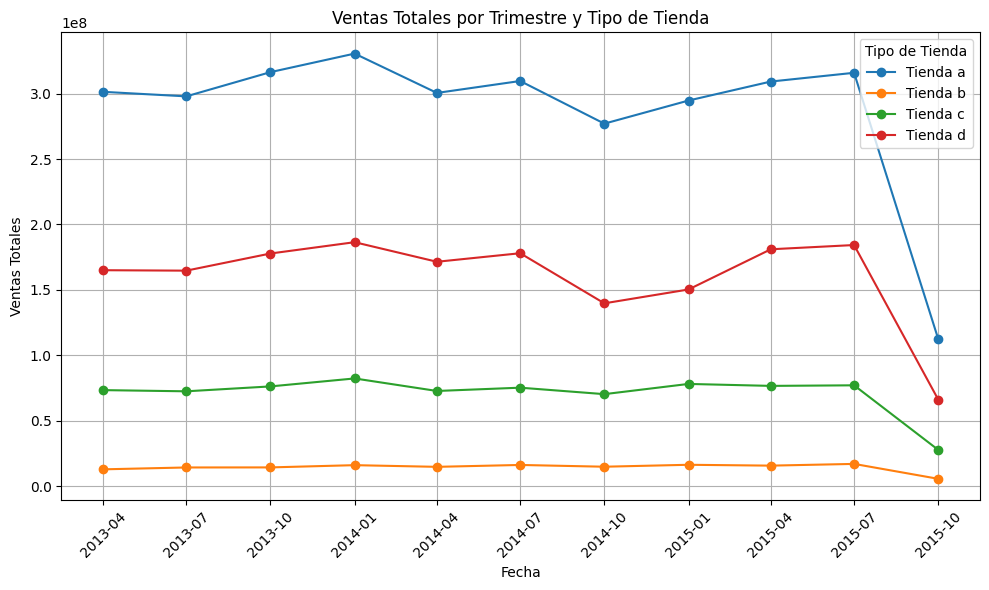

In [138]:
plt.figure(figsize=(10, 6))

for column in total_sales_per_quarter_per_store.columns[1:]:
    plt.plot(total_sales_per_quarter_per_store['Quarter'], total_sales_per_quarter_per_store[column], marker='o', label=f'Tienda {column}')

plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Trimestre y Tipo de Tienda')
plt.xticks(rotation=45)  
plt.legend(title='Tipo de Tienda')
plt.grid(True)

plt.tight_layout()
plt.show() 

# Las cifras de las ventas totales el gráfico se debe multiplicar por 100 millones de Euros 

In [139]:
store_data.to_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/processed/store_data_processed.csv')
train_data.to_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/processed/train_data_processed.csv')
test_data.to_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN_Rodrigo_Meza_Ortiz/data/processed/test_data_processed.csv') 